<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/tobzed/Lab-6/tedwards_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Finite Element Method**
**Tobias Edwards**
24th of February 2019


# **Abstract**

The focus of this lab was Galerkin's FEM for solving boundary value problems in 1D and 2D.

#**About the code**

In [0]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Code by Tobias Edwards (tedwards@kth.se)

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files
from math import *
import numpy as np
import unittest
from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Given a second order differential equation of the form $-u'' = f(x)$ with boundary values $u(0) = u(1) = 0$, we can approximate a solution $U$ by Galerkin's finite element method. The idea is to approximate the solution by piecewise linear functions over a mesh $I$ which is divided into n separate intervals. 

We require that, if the residual $R(U(x)) = U'' + f$, the inner product $(R(U(x)),v) \forall v \in V_h$ is equal to 0, where $v$ is any test function is the function space $V_h$. By the definition of inner products on functions, we have that $\int_{0}^{1} -U''(x) * v(x) dx$ = $\int_{0}^{1} f(x)*v(x) dx$. By partial integration, and the fact that the boundaries are 0, we can rewrite this in a weaker form: $\int_{0}^{1} U'(x)*v'(x) dx = \int_{0}^{1} f(x)* v(x) dx$. Descretizing and expressing as piecewise linear functions by a nodal basis, allows us to express the equation in matrix form $Sx = b$ where $S$ is the stiffness matrix and $b$ the load vector, $x$ contains the coefficients for $U$ expressed as a linear combination of the nodal basis.



# **Results**

FInput is f and a x-node vector which also contains the boundary values. The boundary values are ignored in computation because these nodes contain only a single linear function, whereas the interior intervals contain two basis functions in the 1D case.

### Assignment 1. FEM in 1 dimensions




In [0]:
def load_vector_assembly(f,x_nodes):
    N = x_nodes.size-2
    b = np.zeros(N)
    for i in range(N):
        h1 = x_nodes[i+1]-x_nodes[i]
        h2 = x_nodes[i+2] - x_nodes[i+1]
        b[i] = f(x_nodes[i+1])*(h1+h2)*0.5
    return b


def stiffness_assembly(f,x_nodes):
    N = x_nodes.size-2
    S = np.zeros((N,N))
    for i in range(0,N):
        h1 = (x_nodes[i+1]-x_nodes[i])
        h2 = (x_nodes[i+2]-x_nodes[i+1])
        S[i,i] = 1.0/h1 + 1.0/h2
        if i == 0:
            S[i,i+1] = -1.0/h2
        elif i == N-1:
            S[i,i-1] = -1.0/h1
        else:
            S[i,i+1] = -1.0/h2
            S[i,i-1] = -1.0/h1
    return S

def FEM_1d(f,x_nodes):
    S = stiffness_assembly(f,x_nodes)
    b = load_vector_assembly(f,x_nodes)
    y = np.zeros(x_nodes.size)
    y[1:x_nodes.size-1] = np.linalg.solve(S,b)
    return y

# Tests

Square root error: 0.000
Square root error: 0.000
Square root error: 0.000


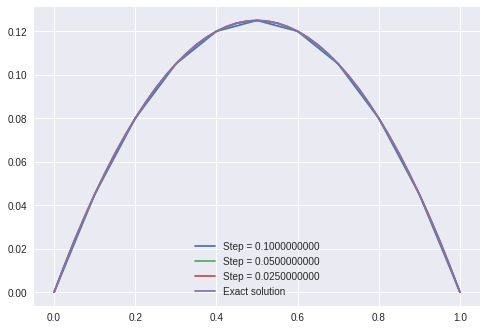

Square root error: 0.000
Square root error: 0.000
Square root error: 0.000


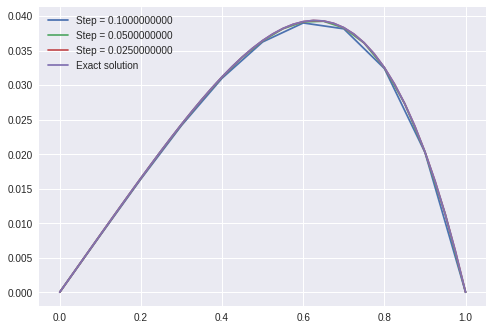

.
----------------------------------------------------------------------
Ran 1 test in 0.600s

OK


In [4]:
class Lab6FunctionsTest(unittest.TestCase):

    def tests(self):
        # BVP: -u'' = f = 1, u(0) = u(1) = 0
        f1 = lambda x: 1
        exact_sol = lambda x: -0.5*x**2 + 0.5*x
        step_size = [0.1,0.05,0.025]
        plt.figure(1)
        for h in step_size:
            xv = np.arange(0.0,1.0+h,h)
            tmp_fem_sol = FEM_1d(f1,xv)
            sqrt_err = sum([ (exact_sol(xv[x])-tmp_fem_sol[x])**2 for x in range(xv.size) ])
            print("Square root error: %.3f" % sqrt_err)
            plt.plot(xv,tmp_fem_sol,label="Step = %.10f" % (h))
            if h == step_size[-1]:
                exact_y = [exact_sol(x) for x in xv]
                plt.plot(xv,exact_y,label="Exact solution")
        plt.legend()
        plt.show()

        # BVP: -u'' = f = x^2, u(0) = u(1) = 0
        f2 = lambda x: x**2
        exact_sol = lambda x: (1.0/12.0) * (x - x**4)
        step_size = [0.1,0.05,0.025]
        plt.figure(1)
        for h in step_size:
            xv = np.arange(0.0,1.0+h,h)
            tmp_fem_sol = FEM_1d(f2,xv)
            sqrt_err = sum([ (exact_sol(xv[x])-tmp_fem_sol[x])**2 for x in range(xv.size) ])
            print("Square root error: %.3f" % sqrt_err)
            plt.plot(xv,tmp_fem_sol,label="Step = %.10f" % (h))
            if h == step_size[-1]:
                exact_y = [exact_sol(x) for x in xv]
                plt.plot(xv,exact_y,label="Exact solution")
        plt.legend()
        plt.show()
unittest.main(argv=['first-arg-is-ignored'], exit=False)

# **Discussion**

I find that understanding the method and how it is derivied mathematically is easy enough to understand. However, I have difficulty in getting intuition for what is going on.  Also, I find that testing has become quite difficult when intuitively I can't entirely see what/how to test. Currently I plot the graphs of my solutions against exact solutions and examine the difference. For instance i tried to do a squared error method but this resulted in nothing.  I couldnt tell if this was because the error was so small that it was pratically 0 or if the approixmation was giving exact points. 